In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, binom

np.random.seed(123)

TypeError: 'module' object is not callable

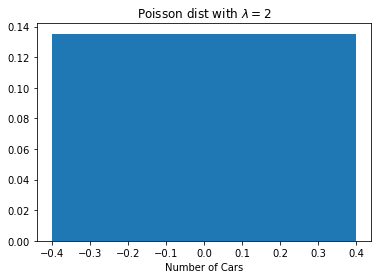

In [2]:
λ = 2

x = np.arange(0.12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson dist with $λ = 2$')
plt.xlabel('Number of Cars')
plt(print)

In [3]:
# What is the probability that no cars drive up in the noon hour?
stats.poisson(λ).pmf(0).round(3)

0.135

In [4]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(λ).sf(2).round(3)

0.323

In [6]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(λ).sf(0).round(2)

0.86

In [8]:
# What grade point average is required to be in the top 5% of the graduating class?
stats.norm(3, 0.3).isf(0.05)

3.4934560880854417

In [9]:
stats.norm(3, 0.3).ppf([0.2, 0.3])

array([2.74751363, 2.84267985])

In [10]:
# If I have a GPA of 3.5, what percentile am I in?
stats.norm(3, 0.3).cdf(3.5)

0.9522096477271853

In [16]:
# by simulation
(np.random.normal(3, 0.3, 100_000) < 3.5).mean()

0.95142

In [8]:
# binom distribution

n = 4326
p = 0.02

stats.binom(n, p).sf(96)

0.1397582363130086

In [9]:
# using simulation

clicks = np.random.choice([0,1], (100, 4326), p = [0.98, 0.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
(clicks.sum(axis = 1)>96).mean()

0.15

In [13]:
# usnig poisson approximation

λ = n * p
stats.poisson(λ).sf(96)

0.14211867659283192

In [14]:
n = 60
p = 0.01

stats.binom(n, p).sf(0)

0.4528433576092388

In [15]:
# by simulation
((np.random.choice([0,1], (100_000, 60), p = [0.99, 0.01])).sum(axis = 1) >0).mean()

0.45142

In [16]:
#How likely is it that the break area gets cleaned up each day?

n = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n, p).sf(0)

0.8342199288437355

Text(0.5, 0, ' # of time are is cleaned per day')

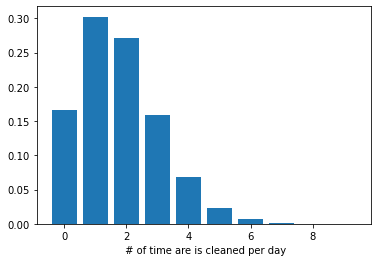

In [34]:
x = np.arange(0, 10)
y = stats.binom(n,p).pmf(x)

plt.bar(x,y)
plt.xlabel(" # of time are is cleaned per day")

In [17]:
# How likely is it that it goes two days without getting cleaned up? All week?

# How many sutudents would visit area in 2 days

stats.binom(n*2, p).pmf(0)

0.02748303199257623

In [18]:
#probability of not getting cleaned for week (5 days)

stats.binom(n *5, p).pmf(0)

0.00012521651388091353

In [19]:
# convert mean and std from people to 'minutes':

mean = 15 * 2 #minutes
std_dev = 3 *2 #minutes

# max time I can be in line without getting late to class = 60 - 15 - 10 = 35 mins
stats.norm(mean, std_dev).cdf(35)

0.7976716190363569

In [20]:
# Solve by considering number of people

mean = 13
std_dev = 3

stats.norm(mean, std_dev).cdf(17.5)

0.9331927987311419

In [21]:
(np.random.normal(30, 6, 100_000)< 35).mean()

0.79906

In [56]:
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
from env import host, username, password

In [48]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

In [49]:
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [52]:
mean = salaries.salary.mean()
std_dev = salaries.salary.std()

In [53]:
# a. What percent of employees earn less than 60,000?
stats.norm(mean, std_dev).cdf(60_000)

0.24385742480214423

In [54]:
# b. What percent of employees earn more than 95,000?
stats.norm(mean, std_dev).sf(60_000)

0.7561425751978558

In [59]:
# c. What percent of employees earn between 65,000 and 80,000?
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

In [60]:
# d. What do the top 5% of employees make?
stats.norm(mean, std_dev).isf(0.05)

100484.64454102777

In [61]:
#another way
salaries.salary.quantile(.95)

104225.84999999998

<AxesSubplot:>

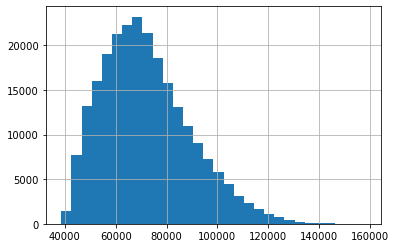

In [62]:
salaries.salary.hist(bins = 30)